# electro_optic Experiment

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import statistics
from scipy.stats import norm
import numpy, scipy.optimize

In [2]:
def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

In [3]:
df = pd.read_excel(r'/home/ashwin/Git/general-physics-lab/electro_optic_effect/electro_optic.xlsx')
print(df)

     V1   C1     C2     C3     C4
0   0.0  0.7    1.4  122.5   15.1
1   0.1  0.8    1.5  113.0   16.0
2   0.2  1.0    1.8   99.3   17.9
3   0.3  1.2    2.9   82.7   21.8
4   0.4  1.6    4.9   59.0   30.3
5   0.5  2.0    8.6   43.5   42.5
6   0.6  2.7   16.4   24.1   64.7
7   0.7  3.3   23.6   14.0   93.1
8   0.8  4.2   33.8    7.6  135.0
9   0.9  5.1   47.2    4.8  150.0
10  1.0  6.2   84.3    5.7  200.0
11  1.1  7.5  104.3   10.5  200.0
12  1.2  8.4  124.2   18.0  300.0
13  1.3  9.0  141.2   27.5  300.0
14  1.4  9.2  154.4   39.5  400.0
15  1.5  8.7  162.1   50.8  400.0
16  1.6  7.7  165.3   58.8  400.0
17  1.7  6.1  166.2   64.2  400.0
18  1.8  4.2  160.1   67.8  400.0
19  1.9  2.4  148.1   66.7  400.0
20  2.0  1.0  129.8   62.1  400.0


In [4]:
V=df['V1'].to_numpy()
current=df['C1'].to_numpy()

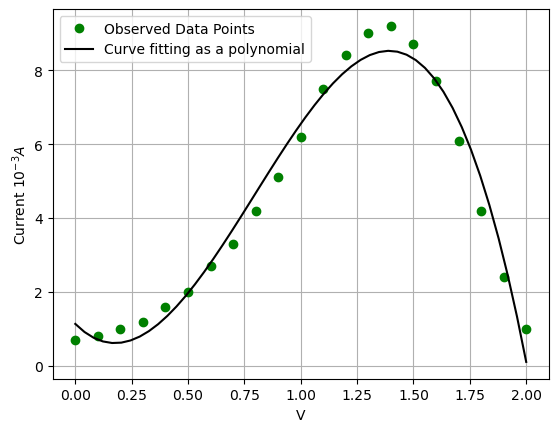

In [5]:
x=V[:]
y=current[:]
deg=4

result=np.polyfit(x,y,deg)


p = np.poly1d(result)

xp = np.linspace(min(x),max(x))

plt.figure()
plt.plot(x, y, 'og',label="Observed Data Points")
plt.plot(xp, p(xp),'k',label="Curve fitting as a polynomial")
plt.xlabel("V")
plt.ylabel("Current $10^{-3}A$")
plt.grid("TRUE")

plt.legend()



Amplitude=-4.12701552994531, Angular freq.=3.070309923126956, phase=0.7401530587824753, offset=4.4940333739267055, Max. Cov.=0.056284472443335364


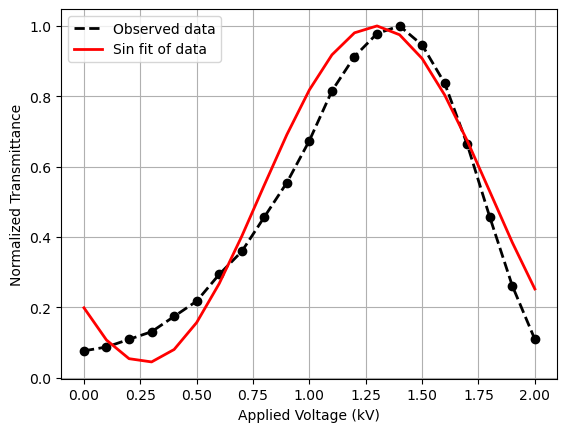

In [6]:

#N, amp, omega, phase, offset, noise = 500, 1., 2., .5, 4., 3
#N, amp, omega, phase, offset, noise = 50, 1., .4, .5, 4., .2
#N, amp, omega, phase, offset, noise = 200, 1., 20, .5, 4., 1
x=V[:]
y=current[:]

res = fit_sin(x, y)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

plt.plot(x, y/max(y), "--k", label="Observed data", linewidth=2)
plt.plot(x, y/max(y), "ok", label="")
plt.plot(x, res["fitfunc"](x)/max(res["fitfunc"](x)), "r-", label="Sin fit of data", linewidth=2)
plt.xlabel("Applied Voltage (kV)")
plt.ylabel("Normalized Transmittance")
plt.grid(True)
plt.legend(loc="best")
plt.show()

In [28]:
import seaborn as seb

Amplitude=-4.12701552994531, Angular freq.=3.070309923126956, phase=0.7401530587824753, offset=4.4940333739267055, Max. Cov.=0.056284472443335364


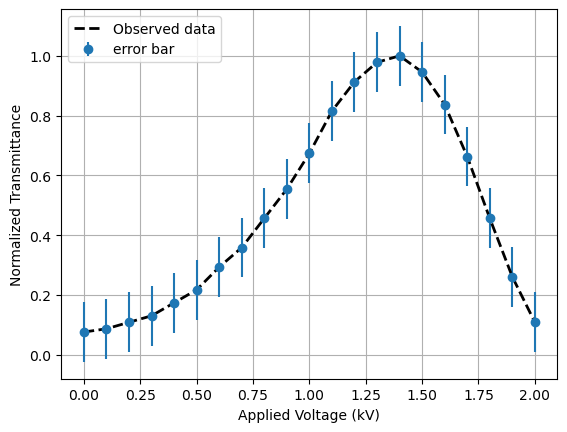

In [35]:
x=V[:]
y=current[:]

res = fit_sin(x, y)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

plt.errorbar(x, y/max(y), yerr=0.1,fmt='o',label="error bar")
plt.plot(x, y/max(y), "--k", label="Observed data", linewidth=2)
#plt.plot(x, y/max(y), "ok", label="")
#plt.plot(x, res["fitfunc"](x)/max(res["fitfunc"](x)), "r-", label="Sin fit of data", linewidth=2)
plt.xlabel("Applied Voltage (kV)")
plt.ylabel("Normalized Transmittance")
plt.grid(True)
plt.legend(loc="best")
plt.show()




TypeError: lineplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [7]:
print(max(res["fitfunc"](x)))
print(min(res["fitfunc"](x)))
print(max(y)/min(y))

8.62029084991087
0.3838882039275271
13.142857142857142


In [8]:
print(x)
print(res["fitfunc"](x))

l=list(res["fitfunc"](x))
print("Half wave voltage", x[l.index(max(l))]-x[l.index(min(l))])
print("extinction ratio voltage from Fit", max(l)/min(l))
print("extinction ratio voltage from observer", max(y)/min(y))


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
[1.71077025 0.91996094 0.46343396 0.3838882  0.68876356 1.3495451
 2.30443004 3.46410818 4.72011503 5.95497651 7.05319624 7.91205795
 8.45123245 8.62029085 8.40342116 7.82090715 6.92723125 5.80597881
 4.56202035 3.31170308 2.17196895]
Half wave voltage 1.0
extinction ratio voltage from Fit 22.455211599933047
extinction ratio voltage from observer 13.142857142857142


In [9]:
df_2 = pd.DataFrame({'x' : x, 'sin(x)' : res["fitfunc"](x)})    
print(df_2)

      x    sin(x)
0   0.0  1.710770
1   0.1  0.919961
2   0.2  0.463434
3   0.3  0.383888
4   0.4  0.688764
5   0.5  1.349545
6   0.6  2.304430
7   0.7  3.464108
8   0.8  4.720115
9   0.9  5.954977
10  1.0  7.053196
11  1.1  7.912058
12  1.2  8.451232
13  1.3  8.620291
14  1.4  8.403421
15  1.5  7.820907
16  1.6  6.927231
17  1.7  5.805979
18  1.8  4.562020
19  1.9  3.311703
20  2.0  2.171969


In [10]:
diff=[1.0,1.3,1.1]

In [11]:
diff=[21.774868537620804,11.499999999999998,25.679779033692743,9.89001502763769,25.520833333333336]

In [12]:
statistics.stdev(diff)

7.648560613204092

In [13]:
statistics.mean(diff)

18.873099186456916

In [14]:
mu = statistics.mean(diff)
sigma = statistics.stdev(diff)
x1 = statistics.mean(diff)-statistics.stdev(diff)
x2 = statistics.mean(diff)+statistics.stdev(diff)
# calculate the z-transform
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

In [15]:
x_shade = np.arange(x1, x2, 0.001) # range of x in spec
x_all = np.arange(-10+z1, 10, 0.001) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
y_shade = norm.pdf(x_shade,mu,sigma)
y2 = norm.pdf(x_all,mu,sigma)

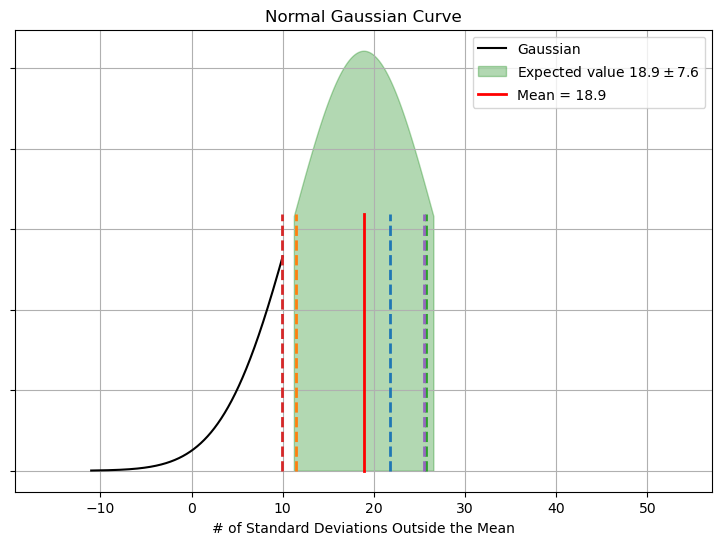

In [16]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
#plt.style.use('fivethirtyeight')
ax.plot(x_all,y2,color='k',label="Gaussian")    
ax.fill_between(x_shade,y_shade,0, alpha=0.3, color='g',label="Expected value ${0} \pm {1}$".format(round(mu,1),round(sigma,1)))
ax.set_xlim([mu-5*sigma,mu+5*sigma])
#ax.set_ylim([0,0.5])

ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')
#ax.hist(diff,bins=len(diff), color='b', alpha=0.9, rwidth=0.2,density=True,label="calculated Data points")
#plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
for i in diff:
    ax.plot([i,i],[0,max(y2)*1.2],'--',lw=2)

ax.plot([mu,mu],[0,max(y2)*1.2],'r-',lw=2,label="Mean = {0} ".format(round(mu,1)))

ax.legend()
ax.grid("TRUE")
plt.show()

In [17]:
len(x_shade)

15298

In [18]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

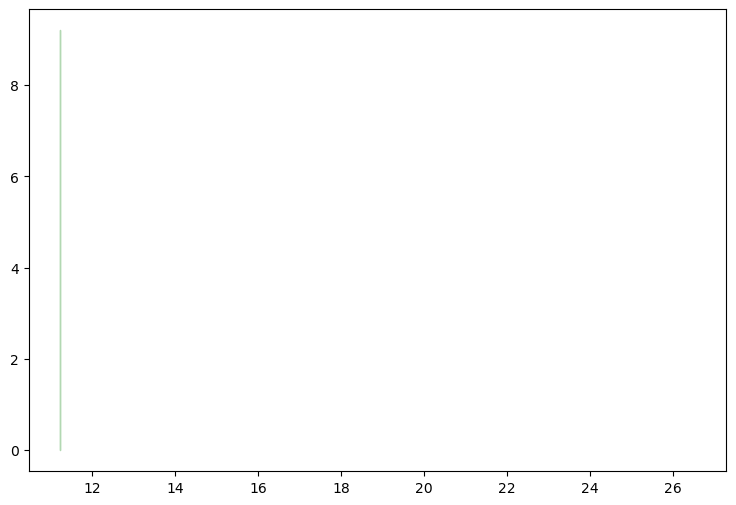

11.224538573252824 [0.7 0.8 1.  1.2 1.6 2.  2.7 3.3 4.2 5.1 6.2 7.5 8.4 9.  9.2 8.7 7.7 6.1
 4.2 2.4 1. ]


In [19]:
fig, ax = plt.subplots(figsize=(9,6))

ax.fill_between(x1,y,0, alpha=0.3, color='g',label="Expected value ${0} \pm {1}$".format(round(mu,1),round(sigma,1)))
ax.fill_between(x2,y2,0, alpha=0.1)
plt.show()
print(x1,y)

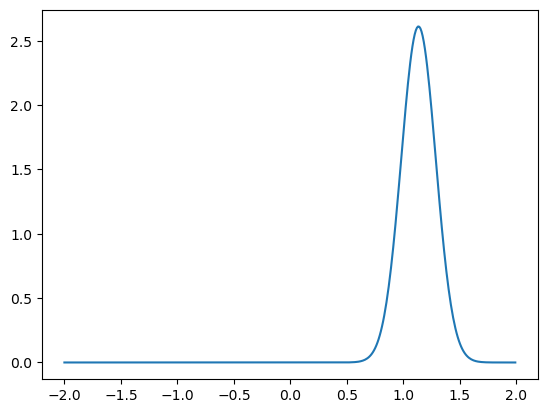

In [20]:
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-2, 2, 0.01)
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, 1.1333333333333333
, 0.1527525231651947))
plt.show()

In [44]:
def D(l,v,v_2,wave_l):  return  (numpy.arcsin(v_2/v))*wave_l/(numpy.pi *l)



In [45]:
wave_l=632 *10**(-9)
l=2.5*10**(-3)
v_2=1

In [46]:
v = np.linspace(0,1)

/tmp/ipykernel_9175/3025326206.py:1: RuntimeWarning: divide by zero encountered in divide
  def D(l,v,v_2,wave_l):  return  (numpy.arcsin(v_2/v))*wave_l/(numpy.pi *l)
/tmp/ipykernel_9175/3025326206.py:1: RuntimeWarning: invalid value encountered in arcsin
  def D(l,v,v_2,wave_l):  return  (numpy.arcsin(v_2/v))*wave_l/(numpy.pi *l)


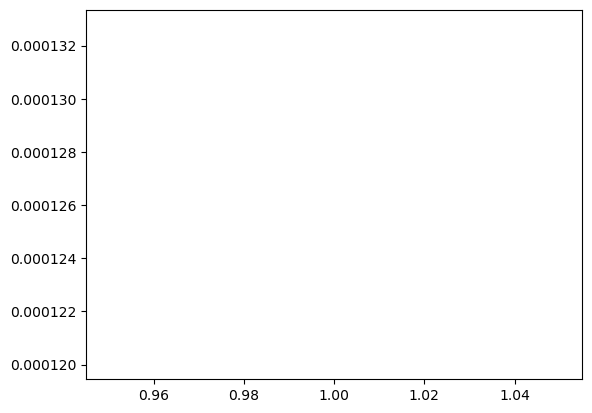

In [47]:
plt.plot(v,D(l,v,v_2,wave_l))

In [42]:
v = np.linspace(1.1,2)

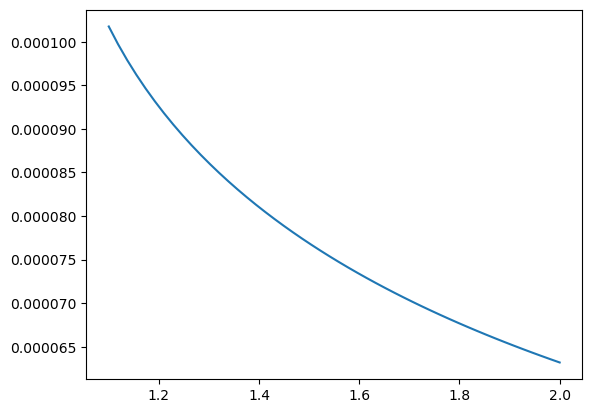

In [43]:
plt.plot(v,D(l,v,v_2,wave_l))